HERE THE PREP TREATED SEARCH GRID DATA IS HANDLED

In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots, plot_dist_hist

LOAD DATA

In [3]:
baseline_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"baseline_results.npy")
baseline_alternate_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"baseline_results_alternate.npy")

In [4]:
baseline_results = np.load(baseline_folder)

In [5]:
baseline_results_alternate = np.load(baseline_alternate_folder)

In [6]:
epi_prep_ec_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"epi_data\prep\0")
epi_prep_eo_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"epi_data\prep\1")

In [7]:
epi_prep_ec_results = np.zeros(
    (   
        16,
        5
    )
)

In [8]:
epi_prep_eo_results = np.zeros(
    (   
        16,
        5
    )
)

In [9]:
for i, pth in enumerate(epi_prep_ec_folder.iterdir()):
    current = np.load(pth)
    epi_prep_ec_results[i, :] = current.copy()

In [10]:
for i, pth in enumerate(epi_prep_eo_folder.iterdir()):
    current = np.load(pth)
    epi_prep_eo_results[i, :] = current.copy()

In [11]:
epi_prep_results = epi_prep_ec_results.__add__(epi_prep_eo_results)/2

In [12]:
wang_prep_ec_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"yulin_wang\prep\0")
wang_prep_eo_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"yulin_wang\prep\1")

In [13]:
wang_prep_ec_results = np.zeros(
    (   
        16,
        5
    )
)

In [14]:
wang_prep_eo_results = np.zeros(
    (   
        16,
        5
    )
)

In [15]:
for i, pth in enumerate(wang_prep_ec_folder.iterdir()):
    current = np.load(pth)
    wang_prep_ec_results[i, :] = current.copy()

In [16]:
for i, pth in enumerate(wang_prep_eo_folder.iterdir()):
    current = np.load(pth)
    wang_prep_eo_results[i, :] = current.copy()

In [17]:
wang_prep_results = wang_prep_ec_results.__add__(wang_prep_eo_results)/2

In [18]:
srm_prep_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"srm_data\prep")

In [19]:
srm_prep_results = np.zeros(
    (   
        16,
        5
    )
)

In [20]:
for i, pth in enumerate(srm_prep_folder.iterdir()):
    current = np.load(pth)
    srm_prep_results[i, :] = current.copy()

In [21]:
spis_prep_folder = pathlib.Path(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"SPIS-Resting-State-Dataset\prep")

In [22]:
spis_prep_alternate_results = np.zeros(
    (   
        8,
        5
    )
)

In [23]:
count=0
for i, pth in enumerate(spis_prep_folder.iterdir()):
    current = np.load(pth)
    spis_prep_alternate_results[count, :] += current.copy()
    if i%2 != 0:
        count+=1

In [24]:
spis_prep_alternate_results /= 2

In [25]:
spis_prep_results = np.zeros(
    (   
        16,
        5
    )
)

In [26]:
for i, pth in enumerate(spis_prep_folder.iterdir()):
    current = np.load(pth)
    spis_prep_results[i, :] = current.copy()

In [27]:
prep_results = np.zeros(
    (   
        64,
        5
    )
)

In [28]:
prep_results_alternate = np.zeros(
    (   
        56,
        5
    )
)

In [29]:
prep_results[0:16, :] = epi_prep_results
prep_results[16:32, :] = srm_prep_results
prep_results[32:48, :] = spis_prep_results
prep_results[48:64, :] = wang_prep_results

In [30]:
prep_results_alternate[0:16, :] = epi_prep_results
prep_results_alternate[16:32, :] = srm_prep_results
prep_results_alternate[32:40, :] = spis_prep_alternate_results
prep_results_alternate[40:56, :] = wang_prep_results

In [31]:
prep_results[:, 2] -= prep_results[:, 1]

In [32]:
prep_results_alternate[:, 2] -= prep_results_alternate[:, 1]

ARTICLE PLOTS

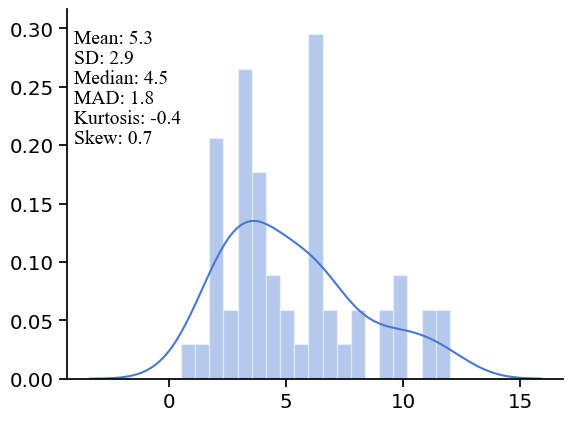

In [33]:
plot_dist_hist(prep_results_alternate[:, 1]+baseline_results_alternate[:, 1])
plt.savefig(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"grid_brain_prep")

In [34]:
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1\prep", prep_results_alternate[:, 1]+baseline_results_alternate[:, 1])
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1\prep_ex", prep_results_alternate[:, 0])

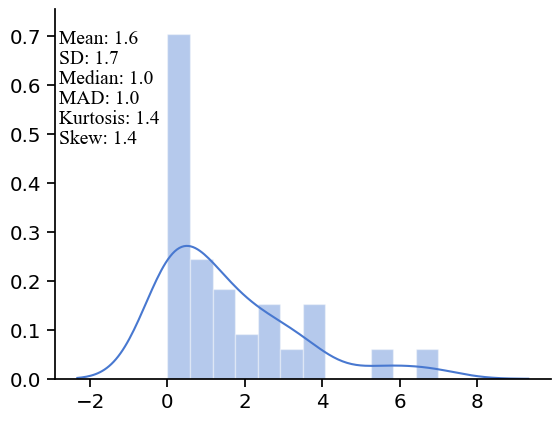

In [35]:
plot_dist_hist(prep_results_alternate[:, 2]+baseline_results_alternate[:, 2])
plt.savefig(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"grid_artefact_prep")

In [36]:
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1_art\prep", prep_results_alternate[:, 2]+baseline_results_alternate[:, 2])
np.save(pathlib.Path(os.path.abspath(os.getcwd())).parent / "results_vault" / r"linear_reg_1_art\prep_ex", prep_results_alternate[:, 0])